**导入相关模块**

In [1]:
import sklearn.datasets as skdata
import seaborn as sns
import pandas as pd
import sklearn.model_selection as skmodel
import sklearn.neighbors as skneighbors
import sklearn.preprocessing as skprep
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

**读取数据**

In [2]:
excel_path=r'E:\project\二分类问题.xlsx'
pain_data = pd.read_excel(excel_path,usecols=[1,2,3,4,5,6,7,8]) 

**查看数据**

In [3]:
pain_data

,CLASS,PLT,CA125,ZXL,ZXLBFB,LB,LBBFB,BDB
0,1,542,210.20,6.93,81.80,0.87,10.30,32.8
1,1,238,438.04,2.96,71.10,0.91,21.70,41.8
2,0,205,1072.00,3.47,65.50,1.28,24.10,35.8
3,1,263,7195.00,3.79,70.90,1.21,22.70,43.4
4,0,136,367.00,1.36,52.70,0.89,34.50,32.8
...,...,...,...,...,...,...,...,...
210,1,524,843.60,4.67,82.50,0.67,11.70,40.4
211,0,294,1262.00,6.60,71.70,1.88,20.40,45.0
212,0,338,31.77,4.13,59.24,2.21,31.64,42.6
213,1,403,775.80,5.76,86.21,0.56,8.42,30.6


**CLASS是标签，后7列是数据。将后7列提取出来**

In [4]:
PLT=pain_data.values[:,1].reshape(215,1)
CA125=pain_data.values[:,2].reshape(215,1)
ZXL=pain_data.values[:,3].reshape(215,1)
ZXLBFB=pain_data.values[:,4].reshape(215,1)
LB=pain_data.values[:,5].reshape(215,1)
LBBFB=pain_data.values[:,6].reshape(215,1)
BDB=pain_data.values[:,7].reshape(215,1)
pain_data.data=np.hstack((PLT,CA125,ZXL,ZXLBFB,LB,LBBFB,BDB))

C:\Users\Bunny\AppData\Local\Temp/ipykernel_21172/1456628575.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  pain_data.data=np.hstack((PLT,CA125,ZXL,ZXLBFB,LB,LBBFB,BDB))


**查看数据**

In [5]:
pain_data.data

array([[5.4200e+02, 2.1020e+02, 6.9300e+00, ..., 8.7000e-01, 1.0300e+01,
        3.2800e+01],
       [2.3800e+02, 4.3804e+02, 2.9600e+00, ..., 9.1000e-01, 2.1700e+01,
        4.1800e+01],
       [2.0500e+02, 1.0720e+03, 3.4700e+00, ..., 1.2800e+00, 2.4100e+01,
        3.5800e+01],
       ...,
       [3.3800e+02, 3.1770e+01, 4.1300e+00, ..., 2.2100e+00, 3.1640e+01,
        4.2600e+01],
       [4.0300e+02, 7.7580e+02, 5.7600e+00, ..., 5.6000e-01, 8.4200e+00,
        3.0600e+01],
       [1.7200e+02, 7.9170e+02, 4.8800e+00, ..., 1.5500e+00, 2.2400e+01,
        4.3000e+01]])

**画出PLT和CA125与类别的散点图**

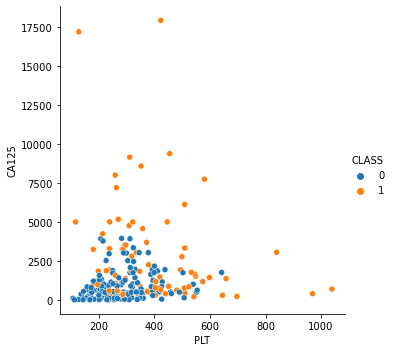

In [6]:
sns.relplot(x='PLT', y='CA125', data=pain_data, hue='CLASS')

**将数据进行归一化处理（归一化到0-1）**

In [7]:
std=MinMaxScaler()
std.fit(pain_data.data)
pain_data_minmax=std.transform(pain_data.data)

**查看归一化后的数据**

In [8]:
pain_data_minmax

array([[0.4667382 , 0.01128   , 0.36619718, ..., 0.14      , 0.1220375 ,
        0.61099366],
       [0.14055794, 0.02400295, 0.14253521, ..., 0.15142857, 0.32366466,
        0.8012685 ],
       [0.10515021, 0.05940428, 0.17126761, ..., 0.25714286, 0.36611249,
        0.6744186 ],
       ...,
       [0.24785408, 0.00131619, 0.2084507 , ..., 0.52285714, 0.4994694 ,
        0.81818182],
       [0.31759657, 0.042864  , 0.30028169, ..., 0.05142857, 0.0887867 ,
        0.56448203],
       [0.06974249, 0.04375188, 0.25070423, ..., 0.33428571, 0.33604528,
        0.82663848]])

**将所有数据中随机选取80%进行训练**

In [11]:
x_train,_, y_train, _ = skmodel.train_test_split(pain_data_minmax, pain_data.CLASS,random_state=1,train_size=0.8)

**查看训练集数据和标签**

In [12]:
x_train

array([[0.10515021, 0.03751438, 0.13126761, ..., 0.36571429, 0.54474708,
        0.83086681],
       [0.43133047, 0.18527122, 0.63042254, ..., 0.31142857, 0.12592855,
        0.74841438],
       [0.04184549, 0.00674008, 0.11887324, ..., 0.29714286, 0.45702158,
        0.72093023],
       ...,
       [0.14055794, 0.18314924, 0.1571831 , ..., 0.27428571, 0.41209763,
        0.75264271],
       [0.35729614, 0.02163862, 0.18647887, ..., 0.21714286, 0.321896  ,
        0.51374207],
       [0.09334764, 0.03482281, 0.16169014, ..., 0.29142857, 0.42978422,
        0.82241015]])

In [13]:
y_train

47     0
202    1
27     0
58     0
40     1
      ..
203    0
137    0
72     1
140    1
37     0
Name: CLASS, Length: 172, dtype: int64

**建立模型**

In [14]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu',input_shape=(7,)))
# model.add(layers.Dropout(0.1))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
# model.add(layers.Dropout(0.1))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1,activation='sigmoid'))

**模型的网络结构**

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               4096      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 16)                5

**开始训练**

In [16]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=1000,batch_size=64)

Epoch 1/1000
3/3 [==============================] - 1s 3ms/step - loss: 0.6910 - accuracy: 0.5407
Epoch 2/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.6815 - accuracy: 0.6047
Epoch 3/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.6774 - accuracy: 0.6105
Epoch 4/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.6518 - accuracy: 0.6105
Epoch 5/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.6565 - accuracy: 0.6163
Epoch 6/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.6406 - accuracy: 0.6628
Epoch 7/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.6341 - accuracy: 0.6512
Epoch 8/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.6318 - accuracy: 0.6860
Epoch 9/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.6277 - accuracy: 0.6744
Epoch 10/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.5889 - accuracy: 0.7151
Epoch 11/1000
3/3 [

3/3 [==============================] - 0s 3ms/step - loss: 0.5098 - accuracy: 0.7500
Epoch 84/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4571 - accuracy: 0.7733
Epoch 85/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4591 - accuracy: 0.7907
Epoch 86/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.5334 - accuracy: 0.7384
Epoch 87/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.5180 - accuracy: 0.7674
Epoch 88/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4557 - accuracy: 0.7907
Epoch 89/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4847 - accuracy: 0.7442
Epoch 90/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4800 - accuracy: 0.7733
Epoch 91/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4896 - accuracy: 0.7558
Epoch 92/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.4548 - accuracy: 0.7791
Epoch 93/1000
3/3 [=====

3/3 [==============================] - 0s 2ms/step - loss: 0.4165 - accuracy: 0.7907
Epoch 166/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4879 - accuracy: 0.7674
Epoch 167/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4075 - accuracy: 0.7965
Epoch 168/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3976 - accuracy: 0.7907
Epoch 169/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4354 - accuracy: 0.7791
Epoch 170/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4873 - accuracy: 0.7907
Epoch 171/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3962 - accuracy: 0.8023
Epoch 172/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4109 - accuracy: 0.7849
Epoch 173/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4354 - accuracy: 0.7849
Epoch 174/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.7791
Epoch 175/1000


3/3 [==============================] - 0s 3ms/step - loss: 0.3353 - accuracy: 0.8547
Epoch 248/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3466 - accuracy: 0.8256
Epoch 249/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3252 - accuracy: 0.8547
Epoch 250/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4384 - accuracy: 0.7558
Epoch 251/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3011 - accuracy: 0.8488
Epoch 252/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3432 - accuracy: 0.8605
Epoch 253/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4388 - accuracy: 0.8023
Epoch 254/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3195 - accuracy: 0.8663
Epoch 255/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3041 - accuracy: 0.8547
Epoch 256/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3222 - accuracy: 0.8721
Epoch 257/1000


3/3 [==============================] - 0s 3ms/step - loss: 0.4739 - accuracy: 0.7907
Epoch 330/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2125 - accuracy: 0.9244
Epoch 331/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2035 - accuracy: 0.9360
Epoch 332/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.2501 - accuracy: 0.8837
Epoch 333/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2544 - accuracy: 0.8837
Epoch 334/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1844 - accuracy: 0.9302
Epoch 335/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2195 - accuracy: 0.9128
Epoch 336/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2482 - accuracy: 0.9302
Epoch 337/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.1659 - accuracy: 0.9360
Epoch 338/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2665 - accuracy: 0.9012
Epoch 339/1000


3/3 [==============================] - 0s 2ms/step - loss: 0.2053 - accuracy: 0.9012
Epoch 412/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.1521 - accuracy: 0.9302
Epoch 413/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.1169 - accuracy: 0.9651
Epoch 414/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0857 - accuracy: 0.9709
Epoch 415/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0811 - accuracy: 0.9651
Epoch 416/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1263 - accuracy: 0.9709
Epoch 417/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3677 - accuracy: 0.8895
Epoch 418/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2623 - accuracy: 0.8837
Epoch 419/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4099 - accuracy: 0.8605
Epoch 420/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.1781 - accuracy: 0.9070
Epoch 421/1000


3/3 [==============================] - 0s 3ms/step - loss: 0.1804 - accuracy: 0.9360
Epoch 494/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.1552 - accuracy: 0.9186
Epoch 495/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0735 - accuracy: 0.9593
Epoch 496/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0871 - accuracy: 0.9535
Epoch 497/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0679 - accuracy: 0.9709
Epoch 498/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0569 - accuracy: 0.9884
Epoch 499/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0482 - accuracy: 0.9826
Epoch 500/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0445 - accuracy: 0.9767
Epoch 501/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0832 - accuracy: 0.9651
Epoch 502/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2086 - accuracy: 0.9244
Epoch 503/1000


3/3 [==============================] - 0s 3ms/step - loss: 0.0413 - accuracy: 0.9942
Epoch 576/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0347 - accuracy: 0.9942
Epoch 577/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0403 - accuracy: 0.9884
Epoch 578/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0443 - accuracy: 0.9942
Epoch 579/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0907 - accuracy: 0.9767
Epoch 580/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0447 - accuracy: 0.9826
Epoch 581/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2046 - accuracy: 0.9244
Epoch 582/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2619 - accuracy: 0.8837
Epoch 583/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2041 - accuracy: 0.9186
Epoch 584/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0667 - accuracy: 0.9826
Epoch 585/1000


3/3 [==============================] - 0s 3ms/step - loss: 0.0952 - accuracy: 0.9593
Epoch 658/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2098 - accuracy: 0.8779
Epoch 659/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0409 - accuracy: 0.9884
Epoch 660/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0534 - accuracy: 0.9709
Epoch 661/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0199 - accuracy: 1.0000
Epoch 662/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.9942
Epoch 663/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0261 - accuracy: 1.0000
Epoch 664/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0588 - accuracy: 0.9767
Epoch 665/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3235 - accuracy: 0.9128
Epoch 666/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2054 - accuracy: 0.9302
Epoch 667/1000


3/3 [==============================] - 0s 3ms/step - loss: 0.0479 - accuracy: 0.9884
Epoch 740/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0215 - accuracy: 1.0000
Epoch 741/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0178 - accuracy: 1.0000
Epoch 742/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0375 - accuracy: 0.9884
Epoch 743/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9942
Epoch 744/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0406 - accuracy: 0.9767
Epoch 745/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0313 - accuracy: 0.9942
Epoch 746/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0449 - accuracy: 0.9884
Epoch 747/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0691 - accuracy: 0.9709
Epoch 748/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.1423 - accuracy: 0.9651
Epoch 749/1000


3/3 [==============================] - 0s 3ms/step - loss: 0.0460 - accuracy: 0.9767
Epoch 822/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0328 - accuracy: 0.9884
Epoch 823/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0173 - accuracy: 1.0000
Epoch 824/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0254 - accuracy: 0.9884
Epoch 825/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9884
Epoch 826/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0140 - accuracy: 1.0000
Epoch 827/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.9942
Epoch 828/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0170 - accuracy: 0.9942
Epoch 829/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0125 - accuracy: 1.0000
Epoch 830/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 1.0000
Epoch 831/1000


3/3 [==============================] - 0s 4ms/step - loss: 0.0442 - accuracy: 0.9767
Epoch 904/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0931 - accuracy: 0.9709
Epoch 905/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.9942
Epoch 906/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 1.0000
Epoch 907/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 0.9942
Epoch 908/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 909/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0152 - accuracy: 1.0000
Epoch 910/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 911/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0131 - accuracy: 0.9942
Epoch 912/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0152 - accuracy: 1.0000
Epoch 913/1000


3/3 [==============================] - 0s 4ms/step - loss: 0.0162 - accuracy: 1.0000
Epoch 986/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 1.0000
Epoch 987/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9884
Epoch 988/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 0.9942
Epoch 989/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 990/1000
3/3 [==============================] - 0s 3ms/step - loss: 9.2187e-04 - accuracy: 1.0000
Epoch 991/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 992/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 993/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1487 - accuracy: 0.9535
Epoch 994/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.5798 - accuracy: 0.9070
Epoch 995/1

**绘制训练过程中准确率和loss值的变化图像**

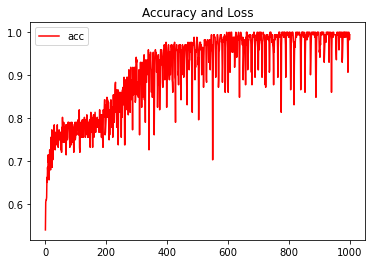

In [17]:
acc = history.history['accuracy']
epochs = range(1, len(acc) + 1)
plt.title('Accuracy')
plt.plot(epochs, acc, 'red', label='acc')
plt.legend()
plt.show()

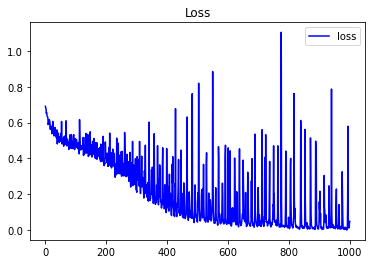

In [23]:
loss = history.history['loss']
plt.title('Loss')
plt.plot(epochs, loss, 'blue', label='loss')
plt.legend()
plt.show()

**随机抽取50%的数据进行测试**

In [19]:
_ ,x_test, _ ,y_test = skmodel.train_test_split(pain_data_minmax, pain_data.CLASS,test_size=0.5)

**测试数据的大小**

In [20]:
x_test.shape

(108, 7)

**测试结果**

In [21]:
results = model.evaluate(x_test,y_test)
print(results)

4/4 [==============================] - 0s 2ms/step - loss: 0.5133 - accuracy: 0.9537
[0.5132713317871094, 0.9537037014961243]
